In [38]:
import pandas as pd
import glob

In [39]:
csv_files=glob.glob("/content/*.csv")

In [40]:
all_data=pd.concat([pd.read_csv(file) for file in csv_files] , ignore_index=True)
print("rows , columns:",all_data.shape)
all_data.head()

rows , columns: (186850, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [41]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [42]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [43]:
all_data.describe(include="all")

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [44]:
print(all_data.isnull().sum())
print(all_data[all_data.isnull().any(axis=1)])

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64
       Order ID Product Quantity Ordered Price Each Order Date  \
198         NaN     NaN              NaN        NaN        NaN   
574         NaN     NaN              NaN        NaN        NaN   
776         NaN     NaN              NaN        NaN        NaN   
1383        NaN     NaN              NaN        NaN        NaN   
1436        NaN     NaN              NaN        NaN        NaN   
...         ...     ...              ...        ...        ...   
184588      NaN     NaN              NaN        NaN        NaN   
185335      NaN     NaN              NaN        NaN        NaN   
185553      NaN     NaN              NaN        NaN        NaN   
185703      NaN     NaN              NaN        NaN        NaN   
185713      NaN     NaN              NaN        NaN        NaN   

       Purchase Address  
198                 NaN 

In [45]:
all_data_clean=all_data.dropna()

In [46]:
all_data_clean = all_data_clean[all_data_clean['Order Date'].str[0:2] != 'Or']

In [47]:
all_data_clean.loc[:, 'Quantity Ordered'] = pd.to_numeric(all_data_clean['Quantity Ordered'])
all_data_clean.loc[:, 'Price Each'] = pd.to_numeric(all_data_clean['Price Each'])

In [48]:
all_data_clean['Order Date'] = pd.to_datetime(all_data_clean['Order Date'], errors='coerce')
all_data_clean.dropna(subset=['Order Date'], inplace=True)
all_data_clean.loc[:, 'Price Each'] = pd.to_numeric(all_data_clean['Price Each'])
all_data_clean.loc[:, 'Month'] = all_data_clean['Order Date'].dt.month
all_data_clean.loc[:, 'Sales'] = all_data_clean['Quantity Ordered'] * all_data_clean['Price Each']
all_data_clean.loc[:, 'City'] = all_data_clean['Purchase Address'].apply(lambda x: x.split(',')[1].strip() if ',' in x else '')

/tmp/ipython-input-186635189.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data_clean['Order Date'] = pd.to_datetime(all_data_clean['Order Date'], errors='coerce')


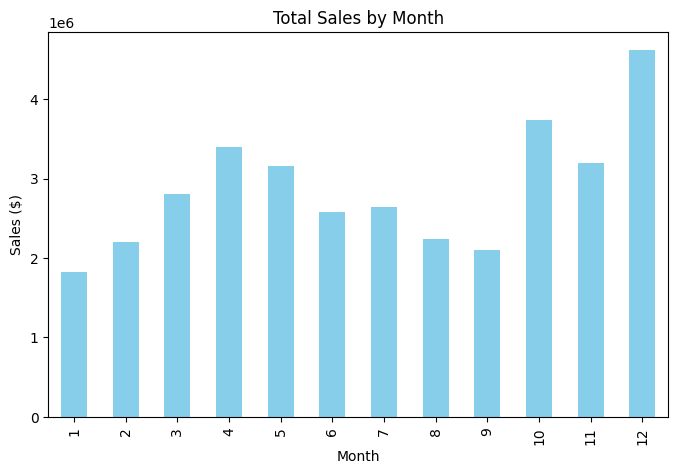

In [49]:
import matplotlib.pyplot as plt

monthly_sales = all_data_clean.groupby('Month')['Sales'].sum()
plt.figure(figsize=(8,5))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.show()


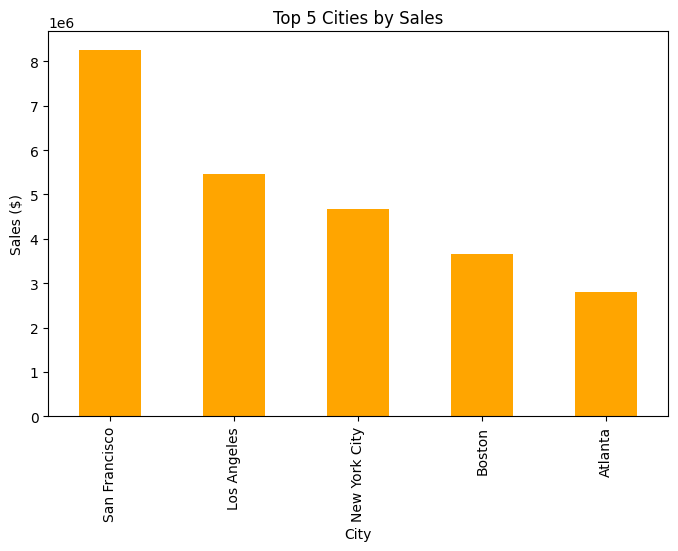

In [50]:
top_cities = all_data_clean.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8,5))
top_cities.plot(kind='bar', color='orange')
plt.title('Top 5 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Sales ($)')
plt.show()


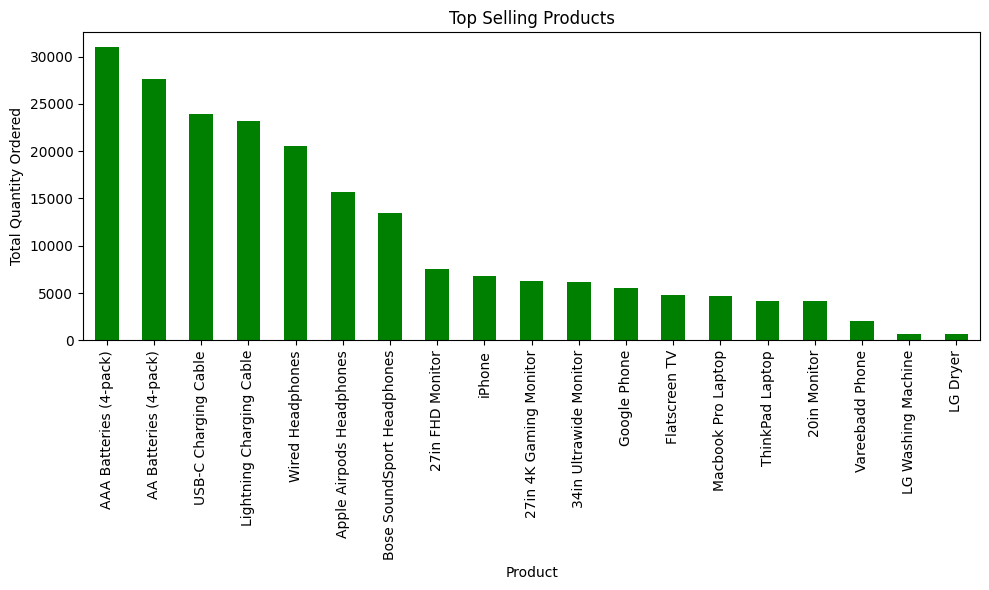

In [51]:
top_products = all_data_clean.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
top_products.plot(kind='bar', color='green')
plt.title('Top Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Quantity Ordered')
plt.tight_layout()
plt.show()


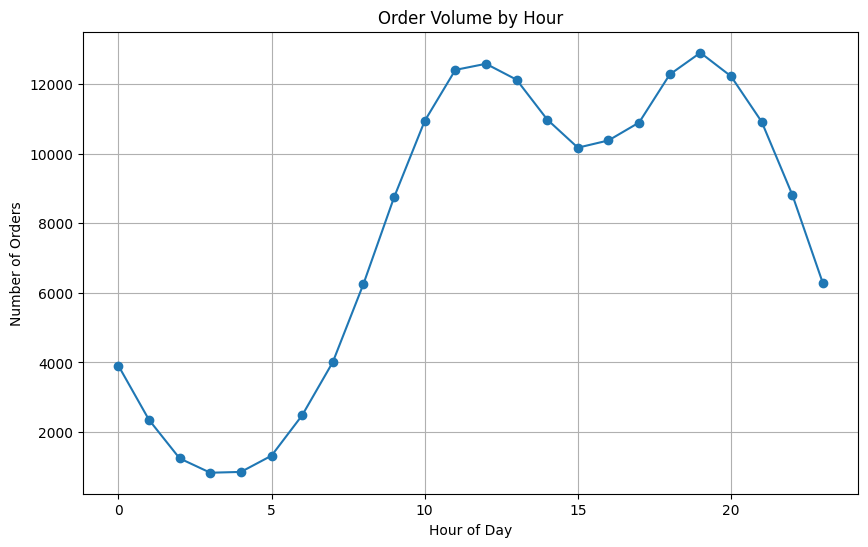

In [52]:
# Extract hour from Order Date
all_data_clean['Hour'] = pd.to_datetime(all_data_clean['Order Date']).dt.hour

hourly_orders = all_data_clean.groupby('Hour').size()
plt.figure(figsize=(10,6))
hourly_orders.plot(kind='line', marker='o')
plt.title('Order Volume by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()


In [53]:
from itertools import combinations
from collections import Counter

df_combo = all_data_clean[all_data_clean['Order ID'].duplicated(keep=False)]
df_combo['Grouped'] = df_combo.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_combo = df_combo[['Order ID','Grouped']].drop_duplicates()

count = Counter()
for row in df_combo['Grouped']:
    products = row.split(',')
    count.update(Counter(combinations(products, 2)))

print("Most common product pairs:")
print(count.most_common(10))


Most common product pairs:
[(('iPhone', 'Lightning Charging Cable'), 1005), (('Google Phone', 'USB-C Charging Cable'), 987), (('iPhone', 'Wired Headphones'), 447), (('Google Phone', 'Wired Headphones'), 414), (('Vareebadd Phone', 'USB-C Charging Cable'), 361), (('iPhone', 'Apple Airpods Headphones'), 360), (('Google Phone', 'Bose SoundSport Headphones'), 220), (('USB-C Charging Cable', 'Wired Headphones'), 160), (('Vareebadd Phone', 'Wired Headphones'), 143), (('Lightning Charging Cable', 'Wired Headphones'), 92)]


/tmp/ipython-input-2815776329.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combo['Grouped'] = df_combo.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


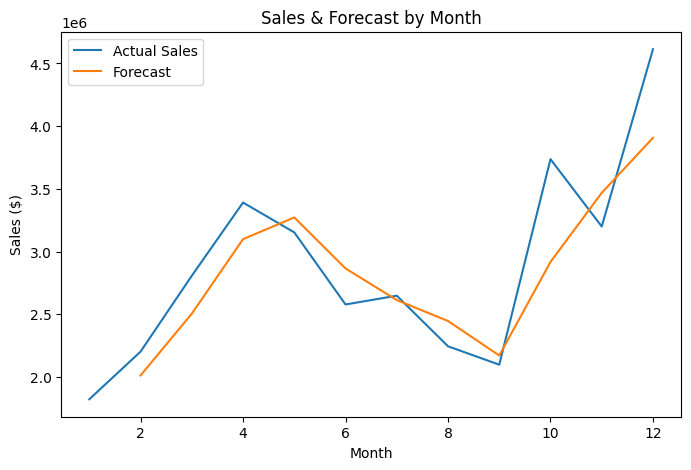

In [55]:
monthly_sales = all_data_clean.groupby('Month')['Sales'].sum()
monthly_sales = monthly_sales.sort_index()

# Calculate the rolling mean forecast on the numeric monthly_sales Series
monthly_sales_with_forecast = pd.DataFrame({
    'Actual Sales': monthly_sales,
    'Forecast': monthly_sales.rolling(window=2).mean()
})

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
# Plot the DataFrame which contains only numeric data
monthly_sales_with_forecast.plot(ax=plt.gca())
plt.title('Sales & Forecast by Month')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.legend(['Actual Sales', 'Forecast'])
plt.show()

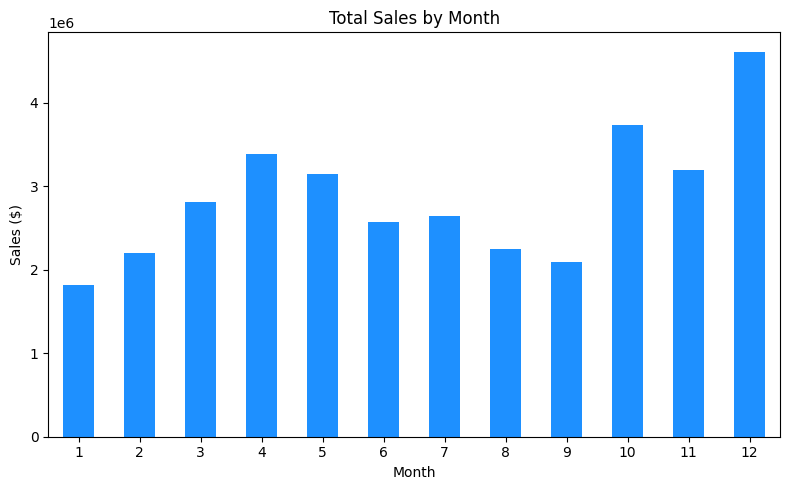

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
monthly_sales = all_data_clean.groupby('Month')['Sales'].sum().sort_index()
monthly_sales.plot(kind='bar', color='dodgerblue')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


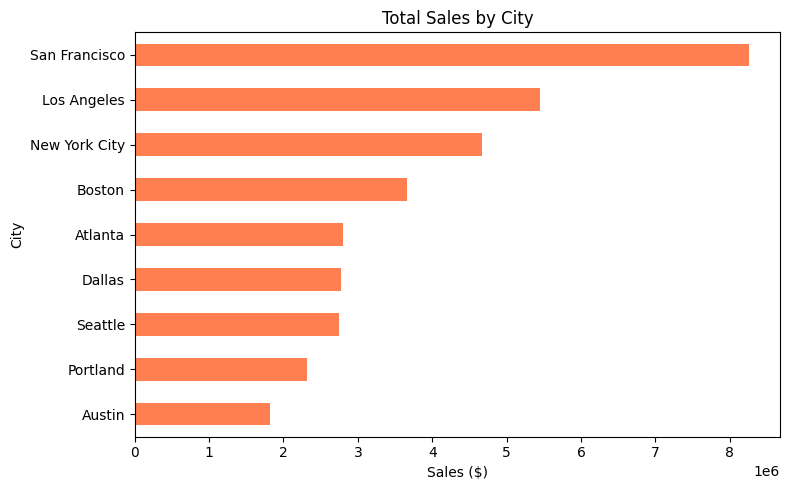

In [57]:
plt.figure(figsize=(8,5))
city_sales = all_data_clean.groupby('City')['Sales'].sum().sort_values()
city_sales.plot(kind='barh', color='coral')
plt.title('Total Sales by City')
plt.xlabel('Sales ($)')
plt.ylabel('City')
plt.tight_layout()
plt.show()


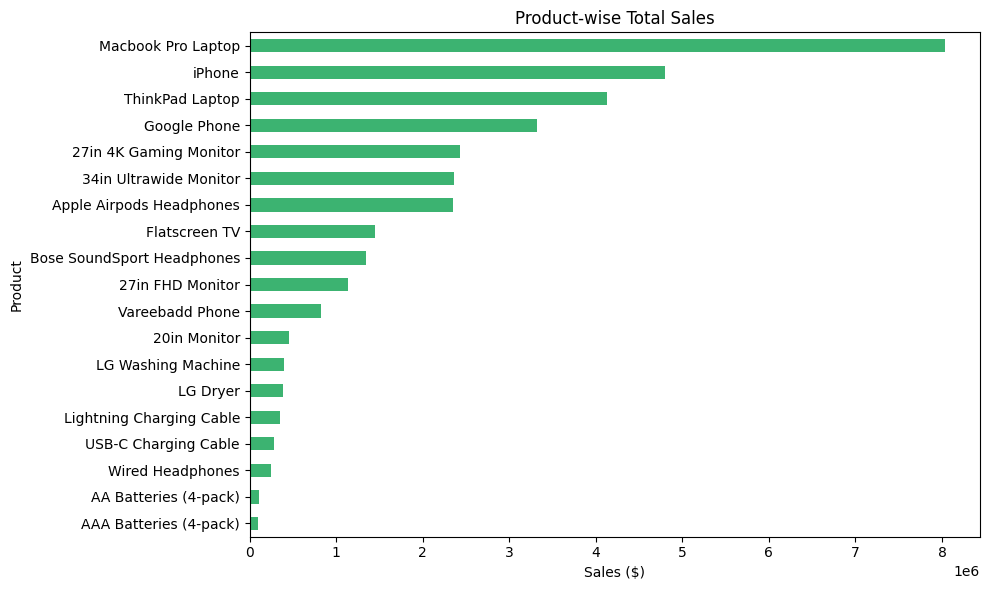

In [58]:
plt.figure(figsize=(10,6))
product_sales = all_data_clean.groupby('Product')['Sales'].sum().sort_values()
product_sales.plot(kind='barh', color='mediumseagreen')
plt.title('Product-wise Total Sales')
plt.xlabel('Sales ($)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


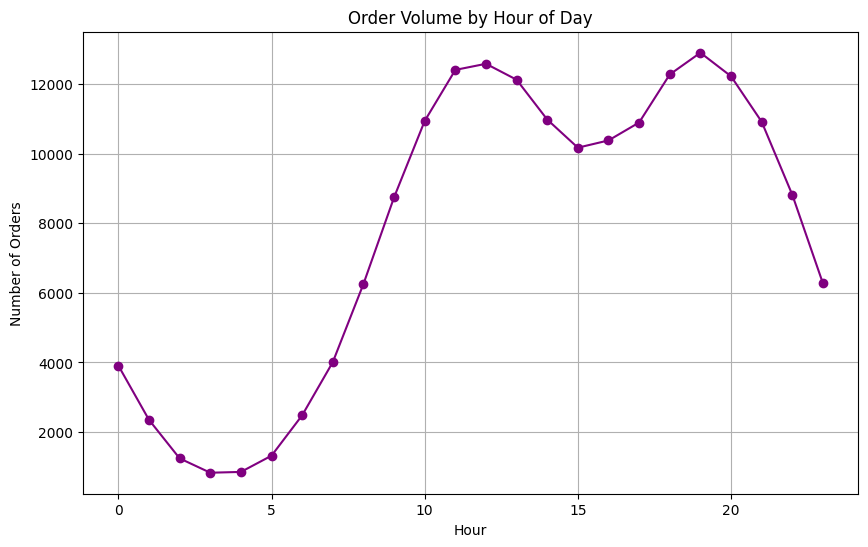

In [59]:
plt.figure(figsize=(10,6))
hourly_orders = all_data_clean.groupby('Hour').size()
hourly_orders.plot(kind='line', marker='o', color='purple')
plt.title('Order Volume by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()
